
# preproessing of data

In [3]:
!gdown --id 1OlcvGWReJMuyYQuOZm149vHWwPtlboR6 --output train.csv
!gdown --id 1Oi5cRlTybuIF2Fl5Bfsr-KkqrXrdt77w --output valid.csv
!gdown --id 1ep9H6-HvhB4utJRLVcLzieWNUSG3P_uF --output test.csv

Downloading...
From: https://drive.google.com/uc?id=1OlcvGWReJMuyYQuOZm149vHWwPtlboR6
To: /home/mohan/Downloads/train.csv
100%|█████████████████████████████████████████| 799k/799k [00:04<00:00, 199kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Oi5cRlTybuIF2Fl5Bfsr-KkqrXrdt77w
To: /home/mohan/Downloads/valid.csv
100%|███████████████████████████████████████| 43.3k/43.3k [00:00<00:00, 198kB/s]
Downloading...
From: https://drive.google.com/uc?id=1ep9H6-HvhB4utJRLVcLzieWNUSG3P_uF
To: /home/mohan/Downloads/test.csv
100%|███████████████████████████████████████| 43.1k/43.1k [00:00<00:00, 111kB/s]


In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv("/content/train.csv")
valid = pd.read_csv("/content/valid.csv")
test = pd.read_csv("/content/test.csv")


In [4]:
train.head()

,text,intent
0,listen to westbam alumb allergic on google music,PlayMusic
1,add step to me to the 50 clásicos playlist,AddToPlaylist
2,i give this current textbook a rating value of...,RateBook
3,play the song little robin redbreast,PlayMusic
4,please add iris dement to my playlist this is ...,AddToPlaylist


In [5]:
train.shape

(13084, 2)

In [6]:
valid.shape

(700, 2)

In [7]:
test.shape

(700, 2)

In [8]:
train['intent'].value_counts()

PlayMusic               1914
GetWeather              1896
BookRestaurant          1881
RateBook                1876
SearchScreeningEvent    1852
SearchCreativeWork      1847
AddToPlaylist           1818
Name: intent, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


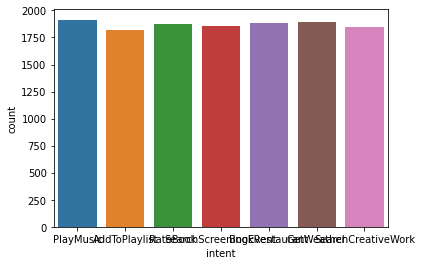

In [9]:
import seaborn as sns
sns.countplot(train['intent'])

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

tokenizer=Tokenizer()

tokenizer.fit_on_texts(train['text'].values)

In [11]:
word_index = tokenizer.word_index
vocab_size=len(word_index)

print(vocab_size)

11086


In [0]:
train_sequences = tokenizer.texts_to_sequences(train['text'].values)
sen_len=[]
for i in train_sequences:
    sen_len.append(len(i))


In [13]:
max(sen_len)

35

In [0]:
train_padded = pad_sequences(train_sequences, maxlen=40, padding='post')

In [0]:
valid_sequences = tokenizer.texts_to_sequences(valid['text'].values)

valid_padded = pad_sequences(valid_sequences, maxlen=40, padding='post')



In [0]:
import tensorflow as tf

classes=list(set(list(train['intent'].values)))

class_index={}

c=0
for i in classes:
    class_index[i]=c
    c+=1

for i in range(train.shape[0]):
    train['intent'].loc[i]=class_index[train['intent'].loc[i]]

y_train=tf.keras.utils.to_categorical(train['intent'].values, num_classes=7, dtype='float32')

for i in range(valid.shape[0]):
    valid['intent'].loc[i]=class_index[valid['intent'].loc[i]]

y_valid=tf.keras.utils.to_categorical(valid['intent'].values, num_classes=7, dtype='float32')

In [17]:
y_train.shape

(13084, 7)

In [18]:
y_valid.shape

(700, 7)

# Model

In [0]:
from tensorflow.keras import layers

tf.keras.backend.clear_session()  

embedding_dim = 64 

def create_func_model():
    inputs = tf.keras.Input(shape=(40,))
    o1 = layers.Embedding(vocab_size+1,embedding_dim )(inputs)
    o2=tf.keras.layers.LSTM(64,return_sequences=True, return_state=True)(o1)
    o3=tf.keras.layers.LSTM(64)(o2)
    o4 = layers.Dense(128, activation='relu')(o3)
    outputs = layers.Dense(7,activation='softmax')(o4)

    model_func = tf.keras.Model(inputs, outputs, name='model_func')

  
    model_func.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    return model_func

In [0]:
model=create_func_model()

In [21]:
model.summary()

Model: "model_func"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 64)       709568      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 40, 64), (No 33024       embedding[0][0]                  
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 64)           33024       lstm[0][0]                       
                                                                 lstm[0][1]              

# Training:

In [22]:
model.fit(train_padded,y_train,epochs=10,validation_data=(valid_padded,y_valid))

Epoch 1/10
409/409 [==============================] - 23s 57ms/step - loss: 1.2540 - accuracy: 0.4233 - val_loss: 0.7454 - val_accuracy: 0.6414
Epoch 2/10
409/409 [==============================] - 22s 55ms/step - loss: 0.4155 - accuracy: 0.8387 - val_loss: 0.3378 - val_accuracy: 0.8886
Epoch 3/10
409/409 [==============================] - 22s 55ms/step - loss: 0.1603 - accuracy: 0.9534 - val_loss: 0.1537 - val_accuracy: 0.9543
Epoch 4/10
409/409 [==============================] - 22s 55ms/step - loss: 0.0732 - accuracy: 0.9810 - val_loss: 0.1294 - val_accuracy: 0.9614
Epoch 5/10
409/409 [==============================] - 22s 54ms/step - loss: 0.0521 - accuracy: 0.9870 - val_loss: 0.1518 - val_accuracy: 0.9586
Epoch 6/10
409/409 [==============================] - 22s 55ms/step - loss: 0.0474 - accuracy: 0.9888 - val_loss: 0.1627 - val_accuracy: 0.9629
Epoch 7/10
409/409 [==============================] - 23s 55ms/step - loss: 0.0478 - accuracy: 0.9894 - val_loss: 0.1466 - val_accuracy:

In [0]:
for i in range(test.shape[0]):
    test['intent'].loc[i]=class_index[test['intent'].loc[i]]

y_test=tf.keras.utils.to_categorical(test['intent'].values, num_classes=7, dtype='float32')

In [0]:
test_sequences = tokenizer.texts_to_sequences(test['text'].values)

test_padded = pad_sequences(test_sequences, maxlen=40, padding='post')

# Predicting:

In [0]:
y_pred=model.predict(test_padded)



In [0]:
pred=np.argmax(y_pred,axis=1)
actual=np.argmax(y_test,axis=1)

# Confusion matrix

In [0]:
con_mat = tf.math.confusion_matrix(labels=actual, predictions=pred).numpy()

In [28]:
import pandas as pd
pd.set_option('max_columns', None)
class_names=classes

con_mat_dataframe = pd.DataFrame(con_mat,index = class_names, columns = class_names)
print(con_mat_dataframe)

                      GetWeather  BookRestaurant  PlayMusic  \
GetWeather                   102               2          0   
BookRestaurant                 0              92          0   
PlayMusic                      0               0         78   
SearchCreativeWork             0               0          4   
SearchScreeningEvent           0               1          0   
RateBook                       0               0          0   
AddToPlaylist                  0               0          0   

                      SearchCreativeWork  SearchScreeningEvent  RateBook  \
GetWeather                             0                     0         0   
BookRestaurant                         0                     0         0   
PlayMusic                              7                     0         0   
SearchCreativeWork                    86                    17         0   
SearchScreeningEvent                   5                   101         0   
RateBook                               

In [29]:
total=0
for i in range(pred.shape[0]):
    if pred[i]==actual[i]:
        total+=1
print('accuracy of test data '+str(total/700))        

accuracy of test data 0.9471428571428572
